<a href="https://colab.research.google.com/github/jinwoongokRe/AI_basic_study/blob/master/new_practice/wine_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from urllib.request import urlretrieve
url = "https://archive.ics.uci.edu" + \
      "/ml/machine-learning-databases/wine-quality" + \
      "/winequality-white.csv"
savepath = "winequality-white.csv"
urlretrieve(url, savepath)

('winequality-white.csv', <http.client.HTTPMessage at 0x7f5980c094a8>)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#데이터 읽어 들이기
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

#데이터를 레이블과 데이터로 분리하기 (*1)
y = wine["quality"]
x = wine.drop("quality", axis=1)

#레이블 변경하기(*1-2) *추가 (mod)
newlist=[]
for v in list(y):
  if v <= 4 :
    newlist +=[0]
  elif v <=7 :
    newlist +=[1]
  else:
    newlist +=[2]
y = newlist

#학습 전용과 테스트 전용으로 분리하기 (*2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

#학습하기(*3)
model = RandomForestClassifier()
model.fit(x_train, y_train)

#평가하기 (*4)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("정답률 =", accuracy_score(y_test, y_pred))




df= pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
df

              precision    recall  f1-score   support

           0       0.60      0.18      0.28        33
           1       0.94      0.99      0.97       906
           2       0.93      0.34      0.50        41

    accuracy                           0.94       980
   macro avg       0.83      0.51      0.58       980
weighted avg       0.93      0.94      0.93       980

정답률 = 0.939795918367347


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


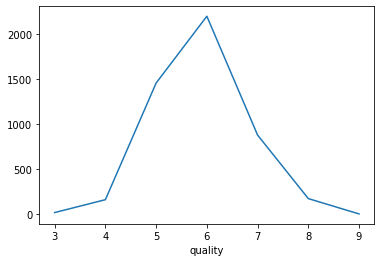

In [7]:
import matplotlib.pyplot as plt

#품질 데이터별로 그룹을 나누고 수 세어보기
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

#수를 그래프로 그리기
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()